In [1]:
from keras import models, layers, optimizers, applications
from keras.preprocessing import image
import matplotlib.pyplot as plt

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(
    'dogs_cats/train',
    target_size=(150, 150), batch_size=15,
    class_mode='binary')

test_datagen = image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'dogs_cats/test',
    target_size=(150, 150), batch_size=15,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    'dogs_cats/validation',
    target_size=(150, 150),
    batch_size=15,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [3]:
model = models.Sequential()
conv_base = applications.VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [4]:
conv_base.trainable = False
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [5]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=3e-5),
              metrics=['acc'])
history = model.fit_generator( train_generator,
      steps_per_epoch=125, epochs=30,
      validation_data=validation_generator,
      validation_steps=60)
model.save('dogs_cats/fine_tuning.h5')

Epoch 1/30
125/125 [==============================] - 21s 171ms/step - loss: 0.5788 - acc: 0.6859 - val_loss: 0.3924 - val_acc: 0.8578
Epoch 2/30
125/125 [==============================] - 19s 153ms/step - loss: 0.4368 - acc: 0.8091 - val_loss: 0.3242 - val_acc: 0.8778
Epoch 3/30
125/125 [==============================] - 19s 151ms/step - loss: 0.3963 - acc: 0.8315 - val_loss: 0.2937 - val_acc: 0.8911
Epoch 4/30
125/125 [==============================] - 19s 154ms/step - loss: 0.3833 - acc: 0.8320 - val_loss: 0.2984 - val_acc: 0.8800
Epoch 5/30
125/125 [==============================] - 19s 153ms/step - loss: 0.3636 - acc: 0.8352 - val_loss: 0.2724 - val_acc: 0.8944
Epoch 6/30
125/125 [==============================] - 19s 154ms/step - loss: 0.3394 - acc: 0.8523 - val_loss: 0.2707 - val_acc: 0.8989
Epoch 7/30
125/125 [==============================] - 19s 151ms/step - loss: 0.3539 - acc: 0.8443 - val_loss: 0.2617 - val_acc: 0.8978
Epoch 8/30
125/125 [==============================] - 1

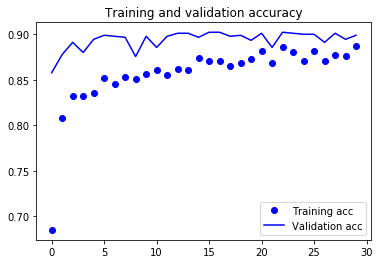

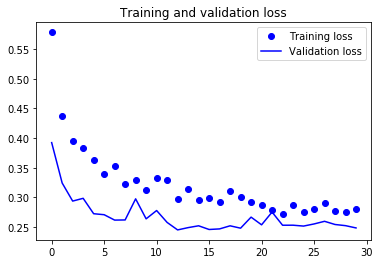

In [6]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [7]:
conv_base.trainable = True
for layer in conv_base.layers:
    layer.trainable = layer.name.startswith('block5_conv')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])
history = model.fit_generator( train_generator,
      steps_per_epoch=100, epochs=100,
      validation_data=validation_generator,
      validation_steps=50)
model.save('dogs_cats/fine_tuning.h5')

Epoch 1/100
100/100 [==============================] - 17s 168ms/step - loss: 0.2885 - acc: 0.8793 - val_loss: 0.2436 - val_acc: 0.8987
Epoch 2/100
100/100 [==============================] - 16s 164ms/step - loss: 0.2687 - acc: 0.8953 - val_loss: 0.2642 - val_acc: 0.8933
Epoch 3/100
100/100 [==============================] - 16s 162ms/step - loss: 0.2529 - acc: 0.8913 - val_loss: 0.2327 - val_acc: 0.9107
Epoch 4/100
100/100 [==============================] - 16s 161ms/step - loss: 0.2407 - acc: 0.8960 - val_loss: 0.2535 - val_acc: 0.9013
Epoch 5/100
100/100 [==============================] - 17s 169ms/step - loss: 0.2113 - acc: 0.9207 - val_loss: 0.2474 - val_acc: 0.9080
Epoch 6/100
100/100 [==============================] - 17s 165ms/step - loss: 0.2128 - acc: 0.9120 - val_loss: 0.2323 - val_acc: 0.9120
Epoch 7/100
100/100 [==============================] - 16s 164ms/step - loss: 0.2048 - acc: 0.9113 - val_loss: 0.2166 - val_acc: 0.9173
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 17s 168ms/step - loss: 0.0394 - acc: 0.9827 - val_loss: 0.2187 - val_acc: 0.9347
Epoch 62/100
100/100 [==============================] - 16s 164ms/step - loss: 0.0353 - acc: 0.9893 - val_loss: 0.2229 - val_acc: 0.9320
Epoch 63/100
100/100 [==============================] - 16s 164ms/step - loss: 0.0442 - acc: 0.9867 - val_loss: 0.2453 - val_acc: 0.9320
Epoch 64/100
100/100 [==============================] - 16s 159ms/step - loss: 0.0266 - acc: 0.9880 - val_loss: 0.2624 - val_acc: 0.9360
Epoch 65/100
100/100 [==============================] - 17s 166ms/step - loss: 0.0422 - acc: 0.9840 - val_loss: 0.2605 - val_acc: 0.9293
Epoch 66/100
100/100 [==============================] - 16s 164ms/step - loss: 0.0358 - acc: 0.9880 - val_loss: 0.3285 - val_acc: 0.9253
Epoch 67/100
100/100 [==============================] - 16s 162ms/step - loss: 0.0518 - acc: 0.9780 - val_loss: 0.2094 - val_acc: 0.9320
Epoch 68/100
100/100 [===================

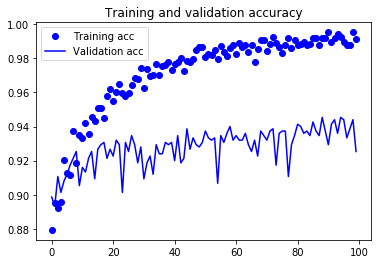

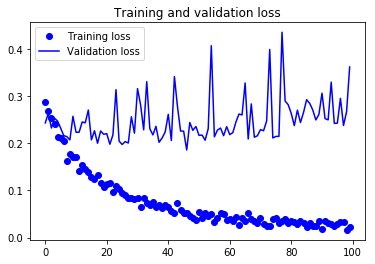

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [13]:
test_generator = test_datagen.flow_from_directory(
    'dogs_cats/test',
    target_size=(150, 150),
    batch_size=158,
    class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.9304274961281569
